# Meditation Journal - Rating Calculator

In [1]:
#Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip uninstall -y serial
!{sys.executable} -m pip install pyserial 

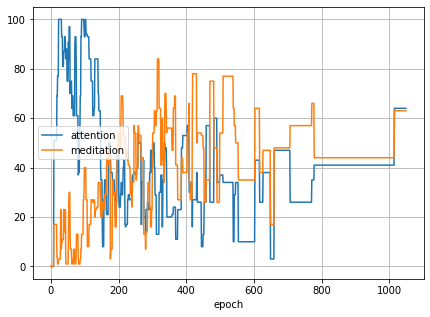

KeyboardInterrupt: 

In [2]:
import mindwave, time
import pylab as pl
from IPython import display
from IPython.display import clear_output
from matplotlib import pyplot as plt
import collections
import numpy as np
%matplotlib inline


def live_plot(data_dict, figsize=(7,5), title=''):
    clear_output(wait=True)
    plt.figure(figsize=figsize)
    for label,data in data_dict.items():
        plt.plot(data, label=label)
    plt.title(title)
    plt.grid(True)
    plt.xlabel('epoch')
    plt.legend(loc='center left') # the plot evolves to the right
    plt.show();


headset = mindwave.Headset('/dev/tty.MindWaveMobile-SerialPo')
time.sleep(2)

data = collections.defaultdict(list)
while True:
    # Meditation, Attention, delta, theta, low-alpha, high-alpha, low-beta, high-beta, low-gamma, mid-gamma
    data['attention'].append(headset.attention)
    data['meditation'].append(headset.meditation)
#    data['delta'].append(headset.waves['delta'])
#    data['theta'].append(headset.waves['theta'])
#    data['low-alpha'].append(headset.waves['low-alpha'])
#    data['high-alpha'].append(headset.waves['high-alpha'])
#    data['low-beta'].append(headset.waves['low-beta'])
#    data['high-beta'].append(headset.waves['high-beta'])
#    data['low-gamma'].append(headset.waves['low-gamma'])
#    data['mid-gamma'].append(headset.waves['mid-gamma'])
    live_plot(data)
    time.sleep(0.5)
    
#while True:
#    print ("Raw value: %s, Attention: %s, Meditation: %s" % (headset.raw_value, headset.attention, headset.meditation))
#    print ("Waves: {}".format(headset.waves))
    


In [3]:
meditation_data = data['meditation']
print(meditation_data)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 17, 17, 17, 17, 17, 17, 17, 17, 4, 4, 1, 1, 1, 3, 3, 3, 3, 3, 3, 23, 23, 7, 10, 10, 10, 11, 11, 11, 23, 23, 23, 14, 14, 23, 4, 1, 1, 1, 1, 1, 1, 1, 11, 26, 30, 30, 30, 13, 7, 7, 7, 7, 1, 3, 3, 3, 1, 1, 7, 7, 7, 3, 1, 1, 1, 8, 13, 13, 13, 13, 13, 3, 1, 1, 1, 1, 1, 3, 3, 7, 7, 13, 13, 13, 13, 13, 27, 27, 30, 40, 40, 40, 40, 40, 27, 27, 27, 27, 8, 8, 8, 8, 8, 17, 17, 17, 17, 17, 17, 27, 27, 27, 27, 27, 26, 26, 26, 26, 27, 27, 20, 23, 23, 23, 23, 23, 24, 24, 24, 24, 34, 34, 34, 34, 34, 34, 34, 21, 20, 20, 20, 20, 24, 26, 26, 26, 26, 23, 23, 29, 29, 29, 29, 29, 30, 44, 44, 44, 44, 44, 41, 47, 47, 47, 47, 47, 3, 7, 7, 7, 7, 7, 35, 35, 29, 29, 29, 29, 30, 30, 16, 16, 16, 16, 26, 26, 47, 47, 47, 47, 54, 47, 51, 51, 51, 51, 47, 60, 69, 69, 69, 69, 69, 64, 53, 53, 53, 53, 53, 51, 51, 44, 47, 47, 47, 47, 47, 43, 43, 41, 41, 41, 41, 40, 40, 29, 29, 29, 29, 29, 24, 34, 34, 34, 34, 34, 57, 54, 54, 54, 54, 54, 35, 35, 40, 40, 40, 40, 57, 57, 53, 53, 53, 53, 53, 53, 53,

 #  Instantanous Amplitude


Outputs 12 bit Raw-Brainwaves (3 - 100Hz) with Sampling rate at 512Hz

Outputs EEG power spectrums (Alpha, Beta, etc.)

Outputs NeuroSky proprietary eSense meter such as Attention, Meditation, and other future meters

EEG/ECG signal quality analysis (can be used to detect poor contact and whether the device is off the head)

# Meditation Score Based of 'Meditation' Median, TGAM module algorithm

- Normal meditation is characterized by high alpha-rhythm (with a frequency of 8-14
- Sometimes an increased gamma (from 30-40 Hz and higher)
- Combined with a low beta-waves (14-30 Hz), that corresponding for thinking "noisy" bustli

Meditation Score (Median): 44.0
Meditation Score (Median): ModeResult(mode=array([44]), count=array([252]))
Meditation Score (Maximum): 84
Meditation Score (Mean): 42.8328530259366


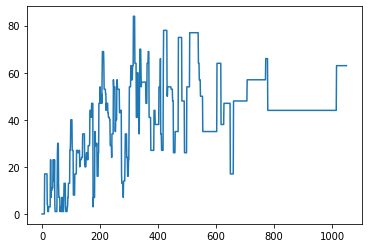

In [14]:
# Produces a N(epochs) Size dataframe which contains raw Channel data, and channel ratios
import neurodsp
import pandas as pd
import numpy
from scipy import stats
from neurodsp.timefrequency import amp_by_time, freq_by_time, phase_by_time # For neurodsp features

def getInstantaneousAmpFeatures(eeg_data, raw_fs=512):


    
    # Calculate the stats
    amp_median = np.nanmedian(eeg_data)
    amp_mode = stats.mode(eeg_data)
    amp_max = np.amax(eeg_data)
    
    
    eeg_data_nonzeros = [i for i in eeg_data if i != 0]
    amp_mean = np.mean(eeg_data_nonzeros)

    return amp_median, amp_max, amp_mode, amp_mean
median_amp, amp_max, amp_mode, amp_mean = getInstantaneousAmpFeatures(meditation_data)

print('Meditation Score (Median): ' + str(median_amp))
print('Meditation Score (Median): ' + str(amp_mode))
print('Meditation Score (Maximum): ' + str(amp_max))
print('Meditation Score (Mean): ' + str(amp_mean))

plt.plot(meditation_data)
plt.show()


